<a href="https://colab.research.google.com/github/Abhinavl3v3l/EVA3/blob/master/Assignment1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt
np.set_printoptions(threshold=10000000)
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url) 				   																						   	# http.client.HTTPResponse Object
	image = np.asarray(bytearray(resp.read()), dtype="uint8")											# Convert http.client.HTTPResponse Object to one array of digits stored in range [0,256]. bytearray()- converts to the hexadecimal array and np.asarray() converts the converted hexadcimal values to array with values inbetween [0-255] since dtype is uint8 or integer of 8 bytes. 
	image = cv2.imdecode(image, 1)																								# Converts array from previous command and convert that array to image format.B G R order
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")


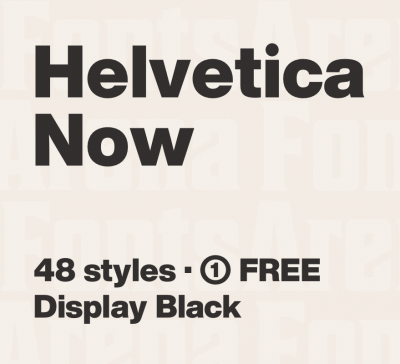

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

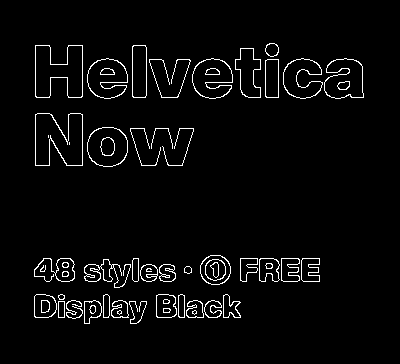

In [0]:
cv2_imshow(edges)

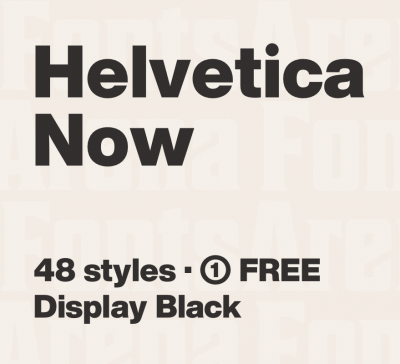

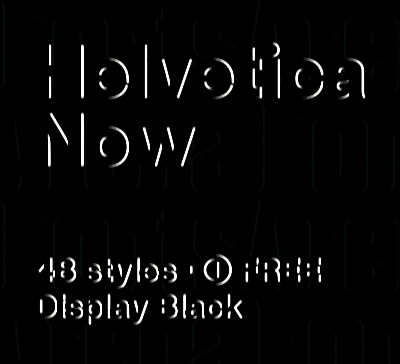

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(image)
cv2_imshow(dst)

In [38]:
# Taking an example if 3x3  matrix on which our 3x3 kernel will convolve and understanding what our Kerne does to it.
print('Understanding Convolution\n')
print('\nConvolve of kernel',b,' in values of same range\n')
a = [[234, 234 ,234],[234 ,234 ,234],[223 ,242, 242]]                            
b = [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]
print('a = ',a)
print('b = ',b)
print('Result of element wise multiplication')
print(np.multiply(a,b))
print("Convolve Operation throws a very dark value : ",np.sum(np.multiply(a,b))) #1 Convolve Operation
print("Hence after convolvin the value is very dark since first and last columns are being negated")

print('\n\n')

## Convolving on letter H 
print('Starting of letter H from Left to Right')
a =[[232, 232 ,42],[234 ,234 ,34],[223 ,242, 42]]
print('a = ',a)
print('b = ',b)
print('Result of element wise multiplication')
print(np.multiply(a,b))
print('Starting of letter H, Kernel has seen one column worth of letter\'H\'')
print("Convolve Opeatation : ",np.sum(np.multiply(a,b)))
print("Hence after convolvin the value is  large negative value hence a very dark pixel")

print('\n\n')

# Inside Letter H (all dark values)
print('Inside Letter H')
a =[[45, 45 ,42],[45 ,60 ,40],[30 ,52, 42]]
print('a = ',a)
print('b = ',b)
print('Result of element wise multiplication')
print(np.multiply(a,b))
print("Convolve Opeatation : ",np.sum(np.multiply(a,b)))

print('\n\n')

#Exiting Letter H
print('Exiting Letter H')
a =[[45, 45 ,242],[45 ,60 ,240],[30 ,52,242]]
print('a = ',a)
print('b = ',b)
print('Result of element wise multiplication')
print(np.multiply(a,b))
print("Convolve Opeatation : ",np.sum(np.multiply(a,b)))
print('\n\n')
print('Kernel has -ve 0 +ve view')
print('So when convolving over the letter \'H\' we see 2 bright then a dark value.Resulting in  Initially. Same when kernel sees values inside letter H\n When the kernel leaves letter H, convolve operation would see small negative values and then very bright values \n Hence output shines until kernel sees all similar values.\n The reason we have white edge of letters detected on right side, we could have lit the left side by reversing the -1 and 1\'s position')
print('If this kernel was to be imagined it has dark dark bright.\n 1. All values in same range results in very dark value.\n 2. A transition from bright to dark will again result in very dark value. Since -1\'s column is dominant.\n 3. Only when we transition from dark toward brighter value, will the 1\'s column will have more weight.\n Hence the reason we have right edge detection. ')
a =[[32, 45 ,242],[34 ,60 ,234],[23 ,52, 242]]
print("Convolve Opeatation : ",np.sum(np.multiply(a,b)))

Understanding Convolution


Convolve of kernel [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]  in values of same range

a =  [[234, 234, 234], [234, 234, 234], [223, 242, 242]]
b =  [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
Result of element wise multiplication
[[-234    0  234]
 [-234    0  234]
 [-223    0  242]]
Convolve Operation throws a very dark value :  19
Hence after convolvin the value is very dark since first and last columns are being negated



Starting of letter H from Left to Right
a =  [[232, 232, 42], [234, 234, 34], [223, 242, 42]]
b =  [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
Result of element wise multiplication
[[-232    0   42]
 [-234    0   34]
 [-223    0   42]]
Starting of letter H, Kernel has seen one column worth of letter'H'
Convolve Opeatation :  -571
Hence after convolvin the value is  large negative value hence a very dark pixel



Inside Letter H
a =  [[45, 45, 42], [45, 60, 40], [30, 52, 42]]
b =  [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
Result of element wise multiplication


In [0]:
## Mini Canny ? I end up detecting all the edges vertical and horizontal
# kernel = np.float32([[1,-1,1],[-1,-1,-1],[1,-1,1]])

# dst = cv2.filter2D(image,-1,kernel)
# cv2_imshow(dst)

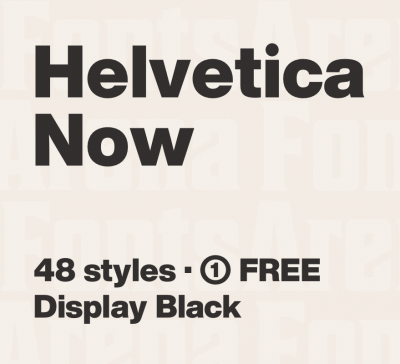

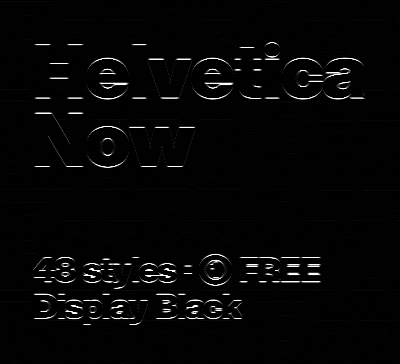


      1. Of Values in same range we recive a very small positive number close to zero.

      2. Of Values transitioning (TOP TO BOTTOM or vice versa) the 2's row is dominant. 

      Hence the Horizontal Edges are LIT UP
      


In [0]:
## Horizontal Edge Detector
kernel = np.float32([[-1,-1,-1],
                     [2, 2, 2],
                     [-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(image)
cv2_imshow(dst)

print('''
      1. Of Values in same range we recive a very small positive number close to zero.\n
      2. Of Values transitioning (TOP TO BOTTOM or vice versa) the 2's row is dominant. \n
      Hence the Horizontal Edges are LIT UP
      ''')

I DO NOT UNDERSTAND HOW TO DO THIS


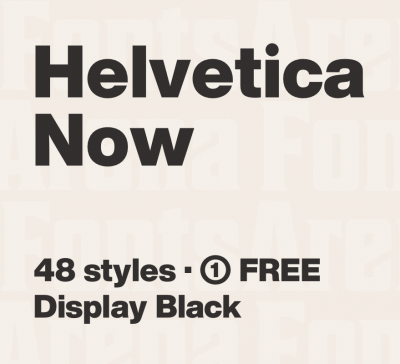

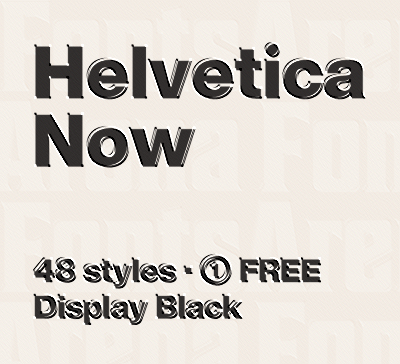

In [87]:
## 45 Degree Edge Detector
print("I DO NOT UNDERSTAND HOW TO EXTRACT 45 DEGREE FEATURE")
kernel = np.float32([[2,0,-1],[-1,2,-1],[-1,-1,2]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(image)
cv2_imshow(dst)

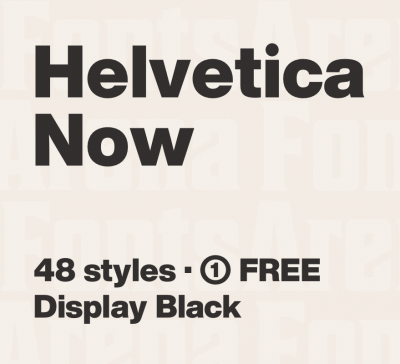

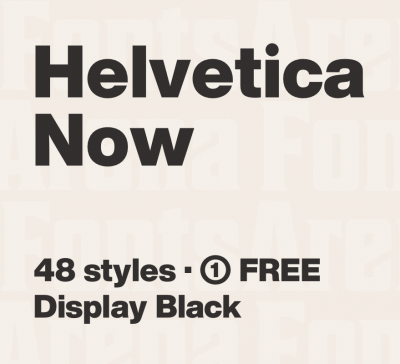


      1. Since convolving using a 3x3 kernel results in one value.

      2. Output of Convolving layer should be same as values in previous layer.

      3. Hence basically averaging from previous layer. 

      4. A way to do using kernel is to pick the middle value from each convolution.

      


In [40]:
## Identity - Return the same image
kernel = np.float32([[0,0,0],
                     [0,1,0],
                     [0,0,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(image)
cv2_imshow(dst)


print('''
      1. Since convolving using a 3x3 kernel results in one value.\n
      2. Output of Convolving layer should be same as values in previous layer.\n
      3. Hence basically averaging from previous layer. \n
      4. A way to do using kernel is to pick the middle value from each convolution.\n
      ''')

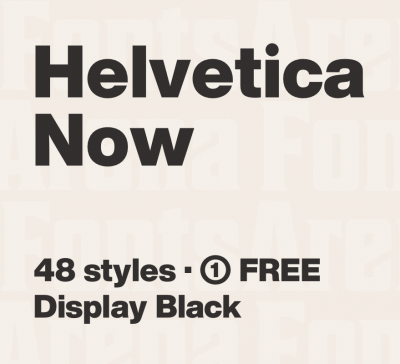

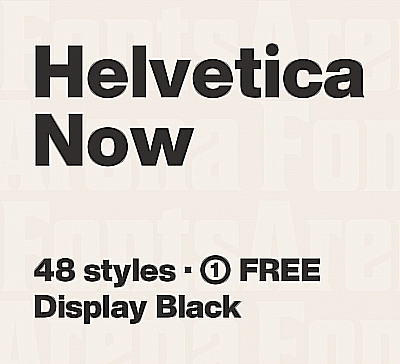

In [59]:
## Sharpen the image
kernel = np.float32([[-1,1,-1],
                     [1, 1, 1],
                     [-1,1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(image)
cv2_imshow(dst)

I do not understand how to Blur Image. Need Help


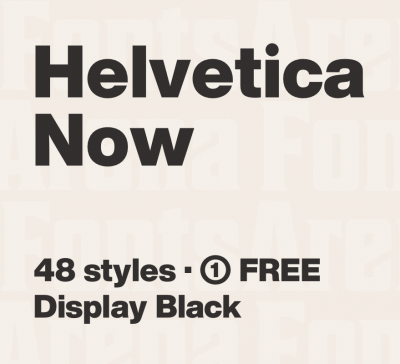

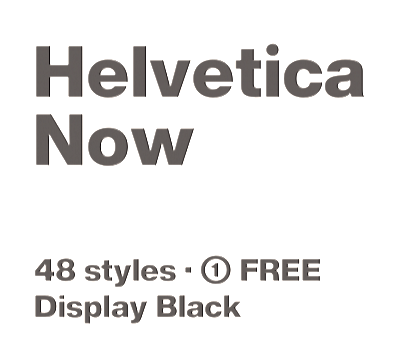

In [97]:
## Blur Kernel
print('I do not understand how to Blur Image. Need Help')
kernel = np.float32([[0, 0.5, 0],
                     [0.5, 1, 0.5],
                     [0, 0.5, 0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(image)
cv2_imshow(dst)